In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv('city_day.csv')
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [13]:
X_train=df['CO']
y_train=df['AQI']

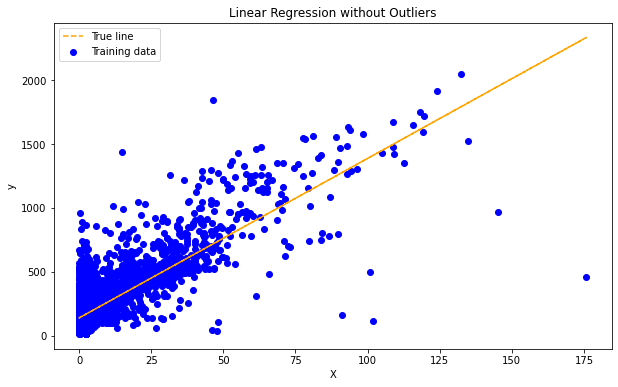

In [65]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train= imputer.fit_transform(X_train)

imputer = SimpleImputer(strategy='mean')
y_train_imputed = imputer.fit_transform(y_train.values.reshape(-1, 1))

# Now you can use y_train_imputed as the target variable for training the LinearRegression model
model = LinearRegression()
model.fit(X_train, y_train_imputed.ravel())

# Predict on both training and testing data
y_train_pred = model.predict(X_train)

plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.plot(X_train, y_train_pred, color='orange', label='True line', linestyle='--')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression without Outliers')
plt.show()

In [62]:
# Introduce outliers
X_outliers = np.array([155, 142, 176, 168]).reshape(-1, 1)
y_outliers = np.array([1725, 1630, 1828, 1635]).reshape(-1, 1)
X_combined = np.concatenate((X_train, X_outliers))
y_combined = np.concatenate((y_train_imputed, y_outliers))


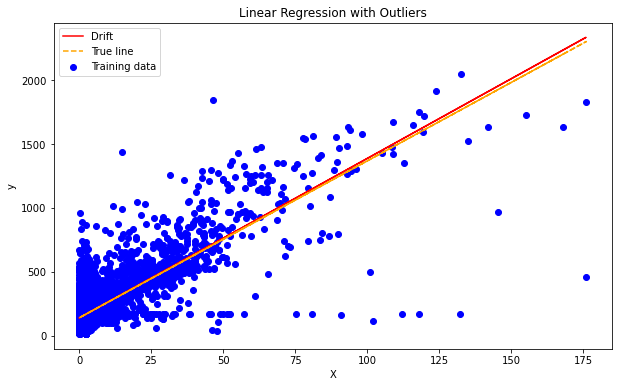

In [66]:

model = LinearRegression()
model.fit(X_combined, y_combined.ravel())

y_train_pred_out = model.predict(X_combined)

plt.figure(figsize=(10, 6))
plt.scatter(X_combined, y_combined, color='blue', label='Training data')
plt.plot(X_train, y_train_pred, color='red', label='Drift')
plt.plot(X_combined, y_train_pred_out, color='orange', label='True line', linestyle='--')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression with Outliers')
plt.show()